<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Integrantes:**  
* César Quiroz Mansilla 201573578-6 cesar.quirozm@sansano.usm.cl
* Jorge Contreras Cabrera 201573547-6 jorge.contrerasc@sansano.usm.cl


> Antes de comenzar se importan las librerias usadas en la resolución del taller 0

In [2]:
#Importaciones librerias usadas.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##  2. Job Salary Prediction

> a) Carge los datos *csv* de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de *pandas*. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto?  

In [4]:

df = pd.read_csv("Train_rev1.csv")
df_train = df.iloc[:-10000]  #todo el conjunto menos los ultimos 10k
df_val = df.iloc[-10000:]    #ultimos 10k valores del conjunto
df_val

#Crear conjuntos de salarios.
maximo=max(df_val.SalaryNormalized) 
largo_conjunto= maximo/10  #el 10 determina la cantida de conjuntos
c1=0
c2=0
c3=0
c4=0
c5=5
c6=0
c7=0
c8=0
c9=0
c10=0
for x in df_val.SalaryNormalized:
    if largo_conjunto >= x:
        c1=c1+1 
    elif(2*largo_conjunto) >= x:
        c2=c2+1
    elif (3*largo_conjunto) >= x:
        c3=c3+1
    elif(4*largo_conjunto) >= x:
        c4=c4+1
    elif (5*largo_conjunto) >= x:
        c5=c5+1
    elif (6*largo_conjunto) >= x:
        c6=c6+1
    elif (7*largo_conjunto) >= x:
        c7=c7+1
    elif (8*largo_conjunto) >= x:
        c8=c8+1
    elif (9*largo_conjunto)>=x:
        c9=c9+1
    else:
        c10=c10+1

Text(0,0.5,'Cantidad de personas')

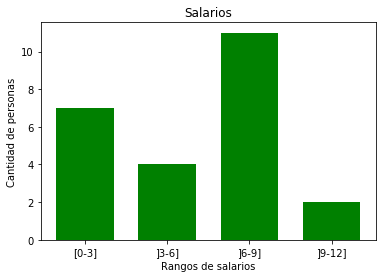

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#prueba
maximo=3
c1=7
c2=4
c3=11
c4=2
l=[c1,c2,c3,c4]

datos = [c1,c2,c3,c4]
X = np.arange(len(datos))
plt.bar(X/2, datos, color = "g", width = 0.35) #Widtth calibra grosor de las barras
plt.xticks(X/2, ["[0-3]","]3-6]","]6-9]","]9-12]"]) #Nombre de cada barra
plt.title("Salarios") #titulo
plt.xlabel('Rangos de salarios') #Nombre eje x
plt.ylabel('Cantidad de personas') #Nombre eje y

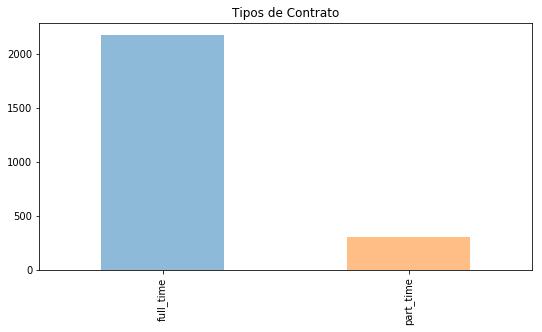

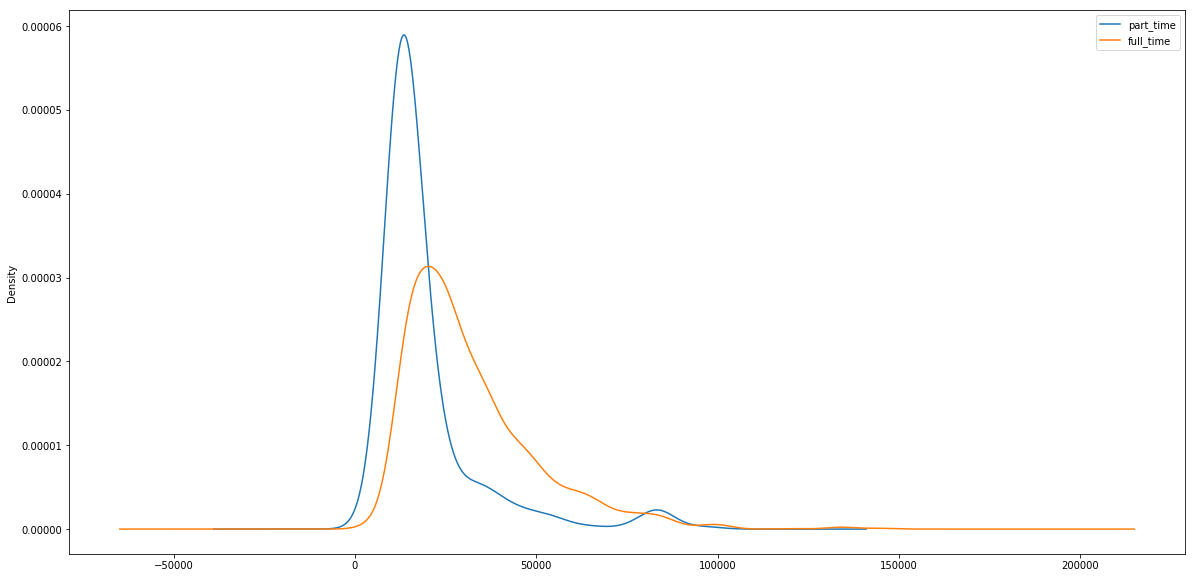

<BarContainer object of 29 artists>

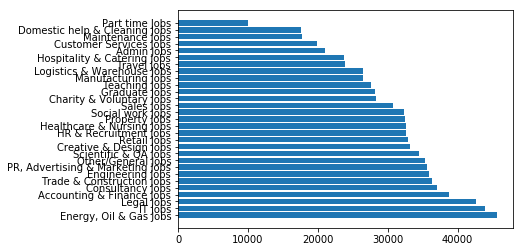

In [31]:
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
df_val.ContractType.value_counts().plot(kind='bar', alpha =0.5)
plt.title("Tipos de Contrato")
plt.show()

ct = df_val[pd.notnull(df_val['ContractType'])]
set1 = ct.ContractType.unique()
fi2 = plt.figure(figsize=(20,10))
for x in set1:
    df_val.SalaryNormalized[df_val.ContractType == x].plot(kind='kde')
plt.legend(set1)
plt.show()

df_val

ct = df_val[pd.notnull(df_val['Category'])]
set1 = ct.Category.unique()
set1

jobs = df.groupby('Category', as_index=False)['SalaryNormalized'].mean()
jobs = jobs.sort_values('SalaryNormalized', ascending=False)

plt.barh(jobs.Category, jobs.SalaryNormalized)




In [32]:
#b
text = df.FullDescription
salary = df.SalaryNormalized

In [8]:
#c
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor1(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words
def word_extractor2(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
 love eat cake
 love eating cake
 loved eating cake
 love eating cake
 n't love eating cake


In [ ]:
#d


## 3. Linear Regression by hand

> a) Escriba una función que calcule la función de pérdida, error cuadrático medio (MSE - *mean squared error*), para un dato o para un conjunto de datos.

La función de perdiidad ECM de define como:
$$
Loss = \frac{1}{N} \sum_i^N ( Y_i - \hat{Y}_i )^2
$$

Donde: 
* $Y$ es un vector de N valores verdaderos.
* $\hat{Y}$ es un vector con N prediciones.

In [1]:
y = [3,5,6] # vector de valoras verdaderos.
x= [4,6,6] # vector de predicioes.
n=len(y)
i=0
loss=0
while i <n:
    loss=loss+((y[i]-x[i])**2)
    i=i+1
loss=loss/n
loss

0.6666666666666666

> b) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior, para un dato o para un conjunto de datos. *Escriba explícitamente la derivada (gradiente)*.

$$
f(x) = \frac{1}{N} ( x - \hat{Y} )^2
$$
$$
f(x)'=\frac{2}{N} ( x - \hat{Y} )
$$

In [2]:
i=0
derivadas=[]
while i <n:
    derivadas.append((2/n)*(x[i]-y[i]))
    i=i+1
    
print(derivadas) #Lista de todas las derivadas
total=sum(derivadas)
print(total) #sumatoria de todas las derivadas

[0.6666666666666666, 0.6666666666666666, 0.0]
1.3333333333333333


> c) Escriba una función que calcule los parámetros de una regresión lineal simple de manera analítica (es decir el mínimo global). 

<div class="alert alert-warning"> Hint: ésto debería ser la ecuación desglosada de la derivada igual a 0, la cual incluye $(X^TX)^{-1}$</div>

* Regresión lineal simple:
$$
\hat{y} = f(\vec{x}) =\beta_0 +\beta_1\cdot \vec{x}
$$
